# Plant Village data

### Data Import

In [21]:
import tensorflow as tf
import sys
import mat

import json
import math
import keras
import keras.backend as K



import numpy as np
import pickle
import cv2
import pandas as pd


import os
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
#from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#from keras.layers.normalization import BatchNormalization

In [17]:
default_image_size = tuple((224, 224))

image_size = 0
directory_root = '../Data'
width=224
height=224
depth=3

In [9]:
# function to convert images to array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size) 
          #  gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [22]:
image_list, label_list = [], []

try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)


    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
        copy=listdir(f"{directory_root}/{plant_folder}")
        plant_list = []
        print(plant_disease_folder_list)
        for disease_folder in copy :
            # remove .DS_Store from list
            print(disease_folder)
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)
            
                
        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list[:350]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'PlantVillage', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus']
Pepper__bell___Bacterial_spot
Pepper__bell___healthy
PlantVillage
Potato___Early_blight
Potato___healthy
Potato___Late_blight
Tomato_Bacterial_spot
Tomato_Early_blight
Tomato_healthy
Tomato_Late_blight
Tomato_Leaf_Mold
Tomato_Septoria_leaf_spot
Tomato_Spider_mites_Two_spotted_spider_mite
Tomato__Target_Spot
Tomato__Tomato_mosaic_virus
Tomato__Tomato_YellowLeaf__Curl_Virus
[INFO] Processing Pepper__bell___Bacterial_spot ...
[INFO] Processing Pepper__bell___healthy ...
[INFO] Processing PlantVillage ...
[INFO] Processing Potato___Early_blight ...

In [28]:
image_size = len(image_list)
print('Number of images: ' + str(image_size))
print('Number of labels: ' + str(len(label_list)))
#lengths match

Number of images: 5052
Number of labels: 5052


In [31]:
image_list[0].shape
#expected size

(224, 224, 3)

<AxesSubplot:>

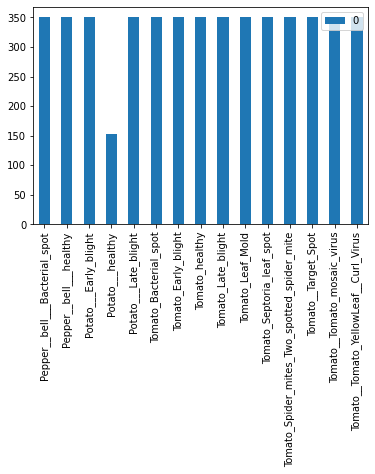

In [30]:
#Displaying distribution of labels
from collections import Counter
counts = Counter(label_list)
df = pd.DataFrame.from_dict(counts, orient='index')
df.plot(kind='bar')

In [33]:
#Binarize labels
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)
print(n_classes)

15


In [34]:
print(label_binarizer.classes_)

['Pepper__bell___Bacterial_spot' 'Pepper__bell___healthy'
 'Potato___Early_blight' 'Potato___Late_blight' 'Potato___healthy'
 'Tomato_Bacterial_spot' 'Tomato_Early_blight' 'Tomato_Late_blight'
 'Tomato_Leaf_Mold' 'Tomato_Septoria_leaf_spot'
 'Tomato_Spider_mites_Two_spotted_spider_mite' 'Tomato__Target_Spot'
 'Tomato__Tomato_YellowLeaf__Curl_Virus' 'Tomato__Tomato_mosaic_virus'
 'Tomato_healthy']


In [38]:
image_list = np.array(image_list, dtype=np.float32)

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_list, image_labels, test_size=0.2, random_state = 42) 


In [40]:
print(len(x_train))
print(len(x_test))

4041
1011


TypeError: unhashable type: 'numpy.ndarray'

In [3]:
#directory_root = '../Data'
#image_list, label_list = [], []
#try:
#    print("[INFO] Loading images ...")
#    root_dir = listdir(directory_root)
#    for directory in root_dir :
        # remove .DS_Store from list
#        if directory == ".DS_Store" :
#            root_dir.remove(directory)

#    for plant_folder in root_dir :
#        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
        
#        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
#            if disease_folder == ".DS_Store" :
#                plant_disease_folder_list.remove(disease_folder)

#        for plant_disease_folder in plant_disease_folder_list:
#            print(f"[INFO] Processing {plant_disease_folder} ...")
#            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
                
#            for single_plant_disease_image in plant_disease_image_list :
#                if single_plant_disease_image == ".DS_Store" :
#                    plant_disease_image_list.remove(single_plant_disease_image)

#            for image in plant_disease_image_list[:200]:
#                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
#                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
#                    image_list.append(image_directory)
#                    label_list.append(plant_disease_folder)
#    print("[INFO] Image loading completed")  
#except Exception as e:
#    print(f"Error : {e}")

In [ ]:
# Sample?
#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#from PIL import Image
#import cv2 as cv

#import os

#Xtrain = []
#ytrain = []

#for dirname, _, filenames in os.walk('/kaggle/input/'):
#    for filename in filenames[:100]:
#        img = cv.imread(os.path.join(dirname,filename))
#        index = dirname.rindex('/')
#        try:
#            img = cv.resize(img, (256, 256))
#            Xtrain.append(img)
#            ytrain.append(dirname[index + 1: ])
#        except :
#            pass
        